In [1]:
using Plots
using SymEngine

# Plotting Test
Starting from Ackley's function

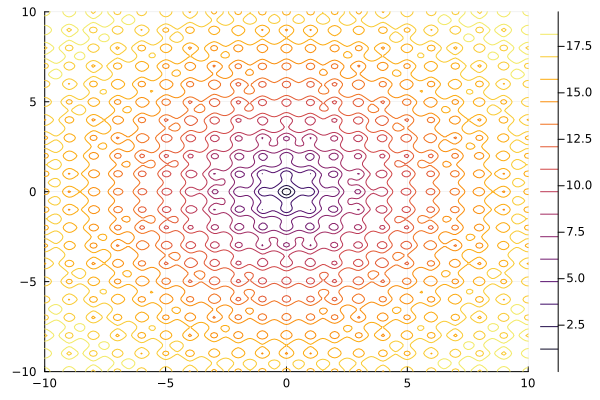

In [4]:
function ackley(x, a=20, b=0.2, c=2π)
    d = length(x)
    return -a*exp(-b*sqrt(sum(x.^2)/d)) -
              exp(sum(cos.(c*xi) for xi in x)/d) + a + ℯ
end
x1 = -10:0.1:10
x2 = -10:0.1:10
z = [ackley([xi, xj]) for xj in x2, xi in x1]
contour(x1, x2, z)

In [138]:
abstract type DescentMethod end
struct GradientDescent <: DescentMethod
    α
end

init!(M::GradientDescent, f, ∇f, x) = M
function step!(M::GradientDescent, f, ∇f, x)
    α, g = M.α, ∇f(x)
    return x - α*g
end

mutable struct NesterovMomentum <: DescentMethod
	α # learning rate
	β # momentum decay
	v # momentum
end
function init!(M::NesterovMomentum, f, ∇f, x)
	M.v = zeros(length(x))
	return M
end
function step!(M::NesterovMomentum, f, ∇f, x)
	α, β, v = M.α, M.β, M.v
	v[:] = β*v - α*∇f(x + β*v)
	return x + v
end

step! (generic function with 2 methods)

In [72]:
@vars x1, x2;
f = (1-x1)^2 + 20*(x2 - x1^2)^2
∇f = [diff(f, x1), diff(f, x2)]
print(∇f)



Basic[-80*x1*(x2 - x1^2) - 2*(1 - x1), 40*(x2 - x1^2)]

In [73]:
f = x -> (1-x[1])^2 + 20*(x[2] - x[1]^2)^2
∇f = x -> [-80*x[1]*(x[2] - x[1]^2) - 2*(1 - x[1]), 40*(x[2] - x[1]^2)]


#138 (generic function with 1 method)

In [210]:
path = []
xₒ = [1, 3]
N = 5000
dm = GradientDescent(0.005)

M = init!(dm, f, ∇f, xₒ)
push!(path, xₒ)
for i in 1 : N
    push!(path, step!(M, f, ∇f, path[end]))
    if i % 100 == 0
        print(path[end])
    end
end

path2 = []
dm2 = NesterovMomentum(0.0004, 0.92, zeros(2))
M2 = init!(dm2, f, ∇f, xₒ)
push!(path2, xₒ)
for i in 1 : N
    push!(path2, step!(M2, f, ∇f, path2[end]))
end

[1.4369437840143389, 2.071693379235103][1.3911420628311826, 1.9415043077997916][1.347870073395307, 1.8224286932131082][1.307365653363465, 1.714335863957372][1.2697955877770264, 1.6169829846689217][1.2352769614947985, 1.530003893173911][1.2038695917138569, 1.4529161341972232][1.1755722469568588, 1.3851351510702208][1.1503232701240549, 1.3259945558878001][1.1280055582898014, 1.2747705540342538][1.1084551882962639, 1.2307081052196602][1.0914724851377755, 1.1930463628303465][1.0768341176571594, 1.1610413141731477][1.0643048853345927, 1.133984203918114][1.0536481581794868, 1.1112150737193582][1.0446343337526993, 1.0921314261586546][1.0370470709769082, 1.0761925178072813][1.0306873754420967, 1.0629200726578742][1.025375815155029, 1.0518963060603796][1.020953243888103, 1.0427601113335865][1.0172804256692307, 1.03520214235408][1.0142369181624786, 1.0289593727038986][1.0117195109025332, 1.023809558126214][1.0096404455492733, 1.0195658929189337][1.0079255810829661, 1.016072040561732][1.006512612

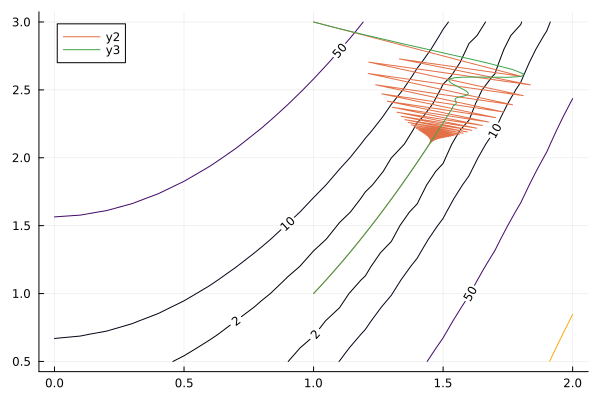

In [209]:
pathX = [p[1] for p in path];
pathY = [p[2] for p in path];
scatter(pathX, pathY)
pathX2 = [p[1] for p in path2];
pathY2 = [p[2] for p in path2]; 

rosenbrock(x, a=1, b=5) = (a-x[1])^2 + b*(x[2] - x[1]^2)^2

x1 = 0:0.1:2
x2 = 0.5:0.1:3
z = [rosenbrock([xi, xj], 1, 20) for xj in x2, xi in x1]
cnt = contour(x1, x2, z, levels=[2,10,50,200,500], clabels=true, cbar=false)
plot!(pathX, pathY)
plot!(pathX2, pathY2)